# Task :- Boundary Detection on Unseen Data

## I use OpenCV for this task . But Why? I can also use something like object detection

## models like YOLO,SSD etc. for this task. The reason is :



- Dataset is not provided for this task. So there must be some reason for that. Reasons can be :
    - We have to find dataset for this task from somewhere.
    - We have to make our own dataset.
    - We have to approach to find the solution for this task from some other method that can be possible to be done in the given time-frame.
    
### 3rd Reason seems to be best for me to try this task. So i go for OpenCV for this task.



## I am using OpenCV Version : 3.4.3 


## I have borrowed the images of college IdCard from my friend as my phone camera is not working properly right now.

In [5]:
cv2.__version__

'3.4.3'

# Specify the path of the Your image - Images that are to be tested

### Example :-> In my case ./images/h1.jpg


# Specify the path where to be resultant images will be stored.

### Example :-> In my case ./images-result/h1.jpg

In [32]:
image_path = './images/p4.jpg'
resultant_path = './images-result/p4.jpg'

# Task Process Starts From Here : 

In [33]:
from PIL import Image
import cv2
import imutils
import numpy as np
image = cv2.imread(image_path)

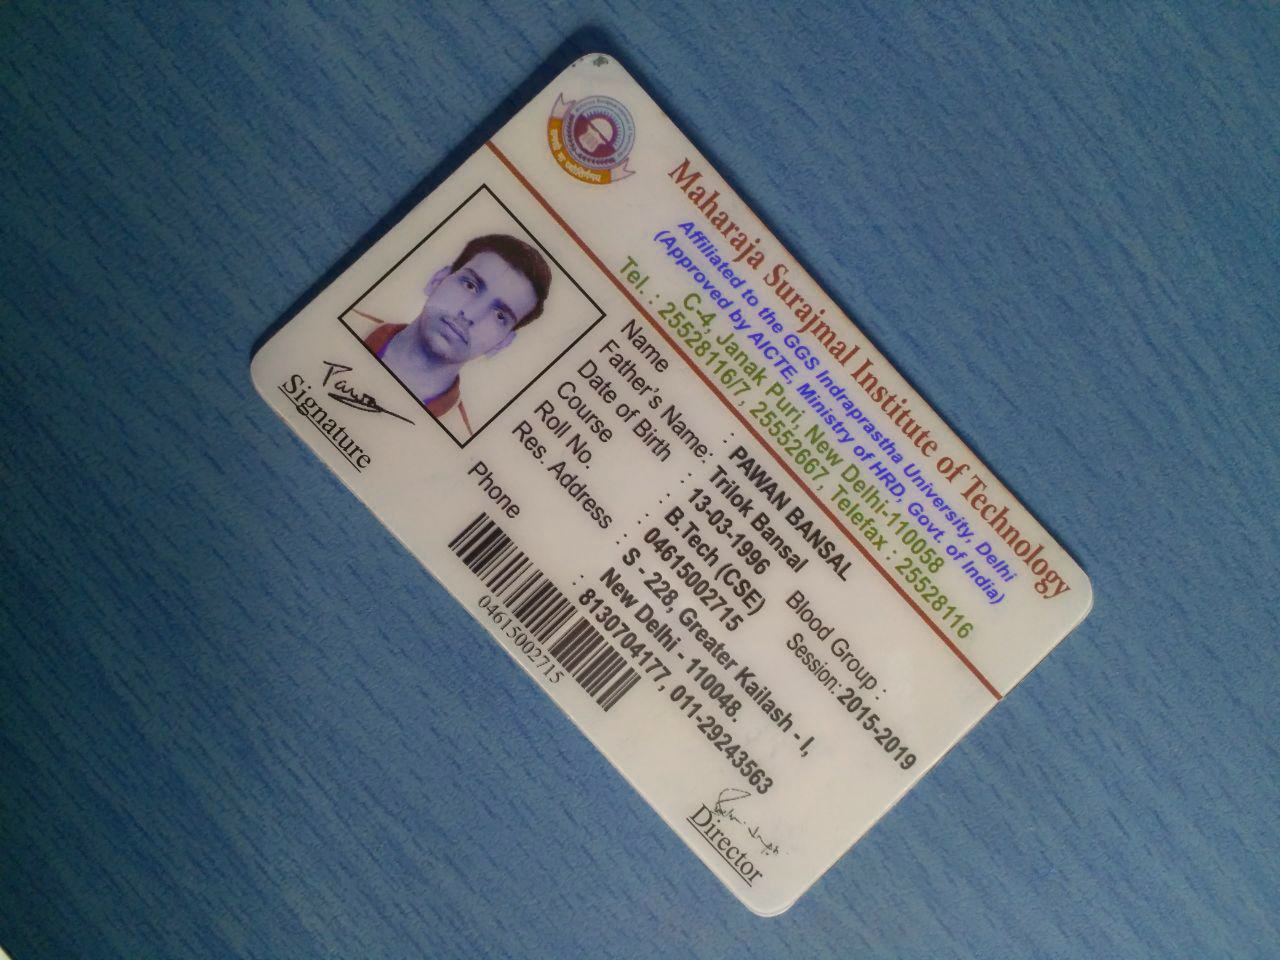

In [34]:
Image.fromarray(image)

### First Step Converting image into grayscale image 

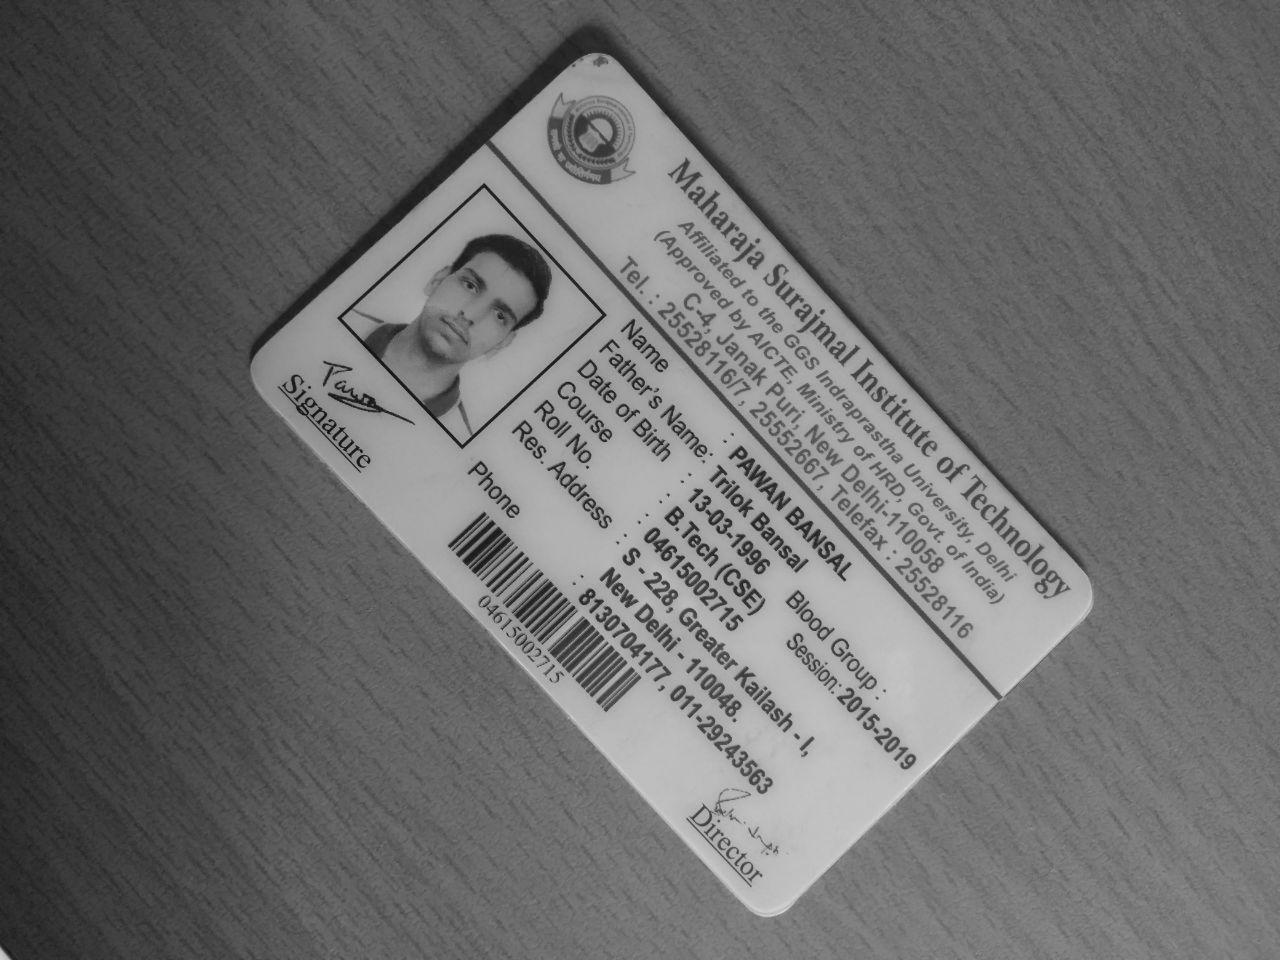

In [35]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

### Second Step to Blurr the image . Why? Reasons:
- Simply to reduce the noise

### We can also use medianfilter here infact median filter has advantages over gaussian filter:
- it removes noise while keeping edges relatively sharp.

### But let it keep simple and I use gaussian blur filter here

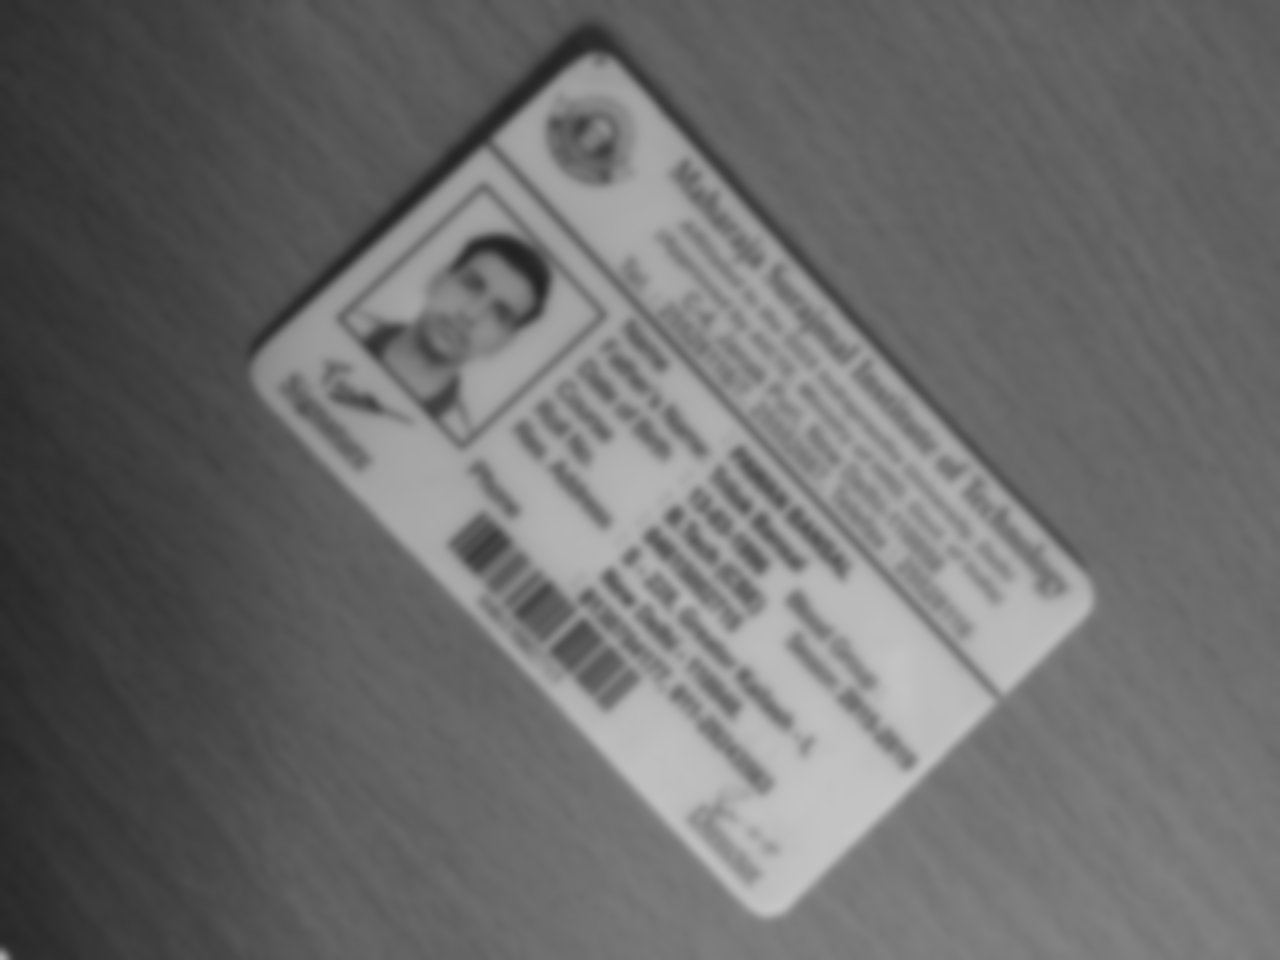

In [36]:
gray = cv2.GaussianBlur(gray, (25,25), 0)
Image.fromarray(gray)

### Third Step is to use Thresholding :

### Adaptive Thresholding is used why??
 - It performs good in all the conditions where image has different lighting conditions in different areas.

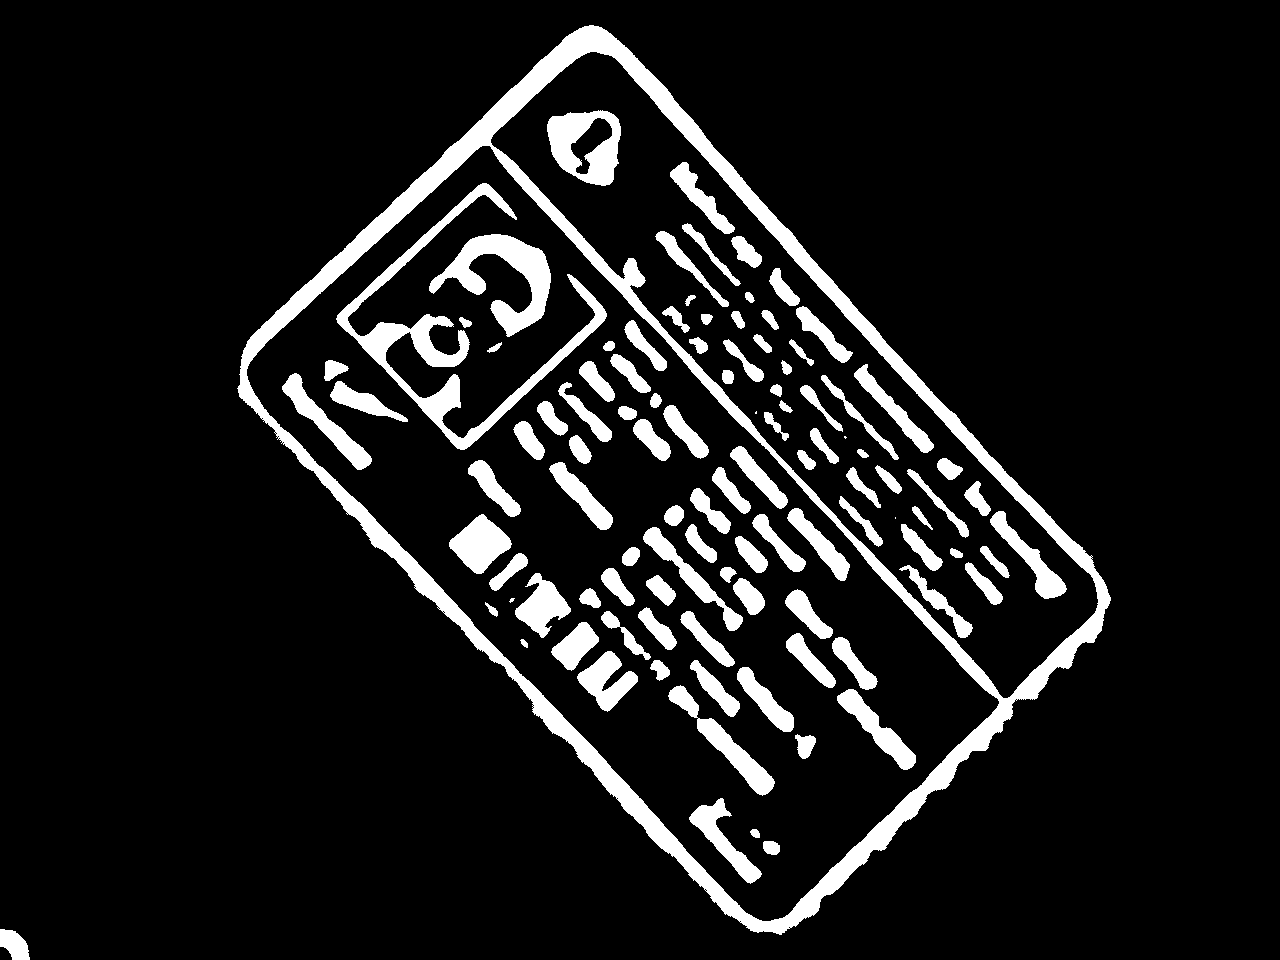

In [37]:
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY_INV,55,10)
Image.fromarray(thresh)

### Fourth Step is to use Erode and Dilation

### For more details on this read on docs :- https://docs.opencv.org/2.4/doc/tutorials/imgproc/erosion_dilatation/erosion_dilatation.html

### In Simple Terms :

### Erode - It makes the object in white smaller.

### Dilate - It makes the object in white bigger.

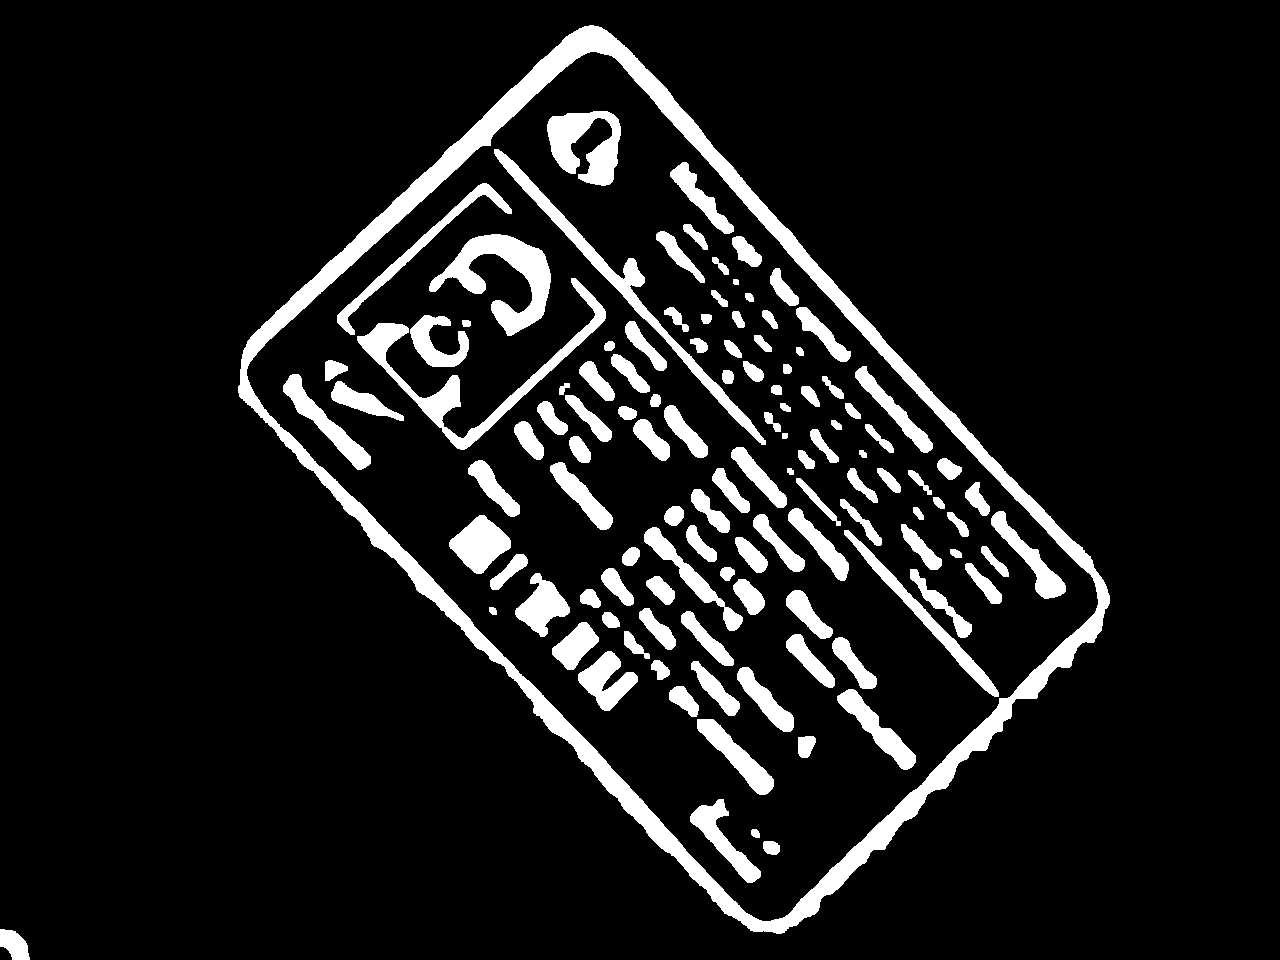

In [38]:
# I have used here iteration of 2 

thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
Image.fromarray(thresh)

### Fifth Step (Final Step) - It Contains series of Steps

#### 1. Find the Contours from the threshold image . Important thing to note here is :

- cv2.RETR_EXTERNAL => If we use this flag, it returns only extreme outer flags. All child contours are left behind. 
- cv2.CHAIN_APPROX_SIMPLE => It will only give us the endPoints.It will compresses horizontal, vertical, and diagonal segments and leaves only their end points.

#### 2. Getting the points of contour which is having the maximum contour area.
#### 3. We will draw the rectangle based on the contours we have find out on an image.

In [39]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(image, [box], 0, (0, 0, 255),5)
Image.fromarray(image)
cv2.imwrite(resultant_path,image)

True

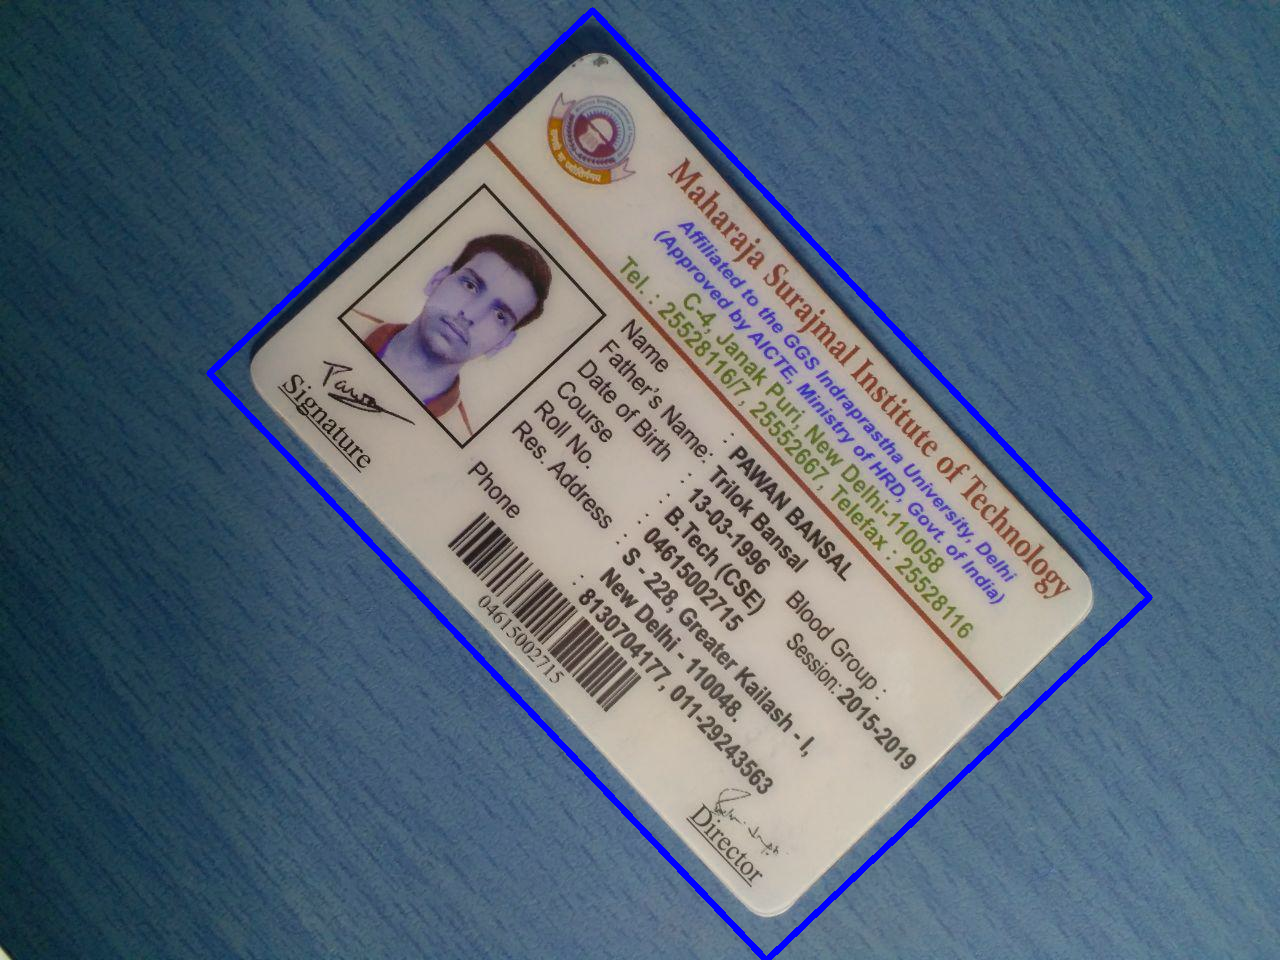

In [40]:
Image.fromarray(image)

# Thank You